# Trabajo de Mentoria - DiploDatos - Parte 1

# Grupo A
    
Integrantes: 
    <li> Bruno Garcia
    <li> Nicolas Chiapello
    <li> Martin Peñas
        
        
## Consigna Entrega nº 1
Aqui esta el link a los datasets, donde encontraremos acciones, cryptomonedas, indicadores, Noticias y algunos labels con los que iremos trabajando durante el año.

https://drive.google.com/drive/folders/1PKno2IxagFiElYqMR1Xy7vpmuUEIMD2J?usp=sharing

El primer dataset consiste en
List item
Ticker
Titulo de noticia
Contenido de Noticia
Fecha de noticia
El segundo dataset consiste en
Ticker
200 Indicadores financieros
Año
Class (Fue una buena inversión si o no ese año para ese ticker)
Analisis y Visualizacion
Exploraremos los datos importando los CSV en una notebook Se proponen algunas ideas para arrancar:

### Del dataset financial_data.csv:
Explorar indicadores, elegir algunos hasta 10, para identificar límites y distribución, extraer medidas de tendencia central, medidas de dispersión, outliers, y si encontramos valores NaN.

Visualizar distribuciones de los índices financieros

Graficar cantidad de registros agrupados por año

Graficar cantidad de registros agrupados por sector

Distribución de PRICE VAR

Distribución de PRICE VAR agrupados por año y por sector

Crear Matriz de correlación entre indicadores incluyendo PRICE VAR

Elegir Algunos índices donde encontramos mayor correlación y realizar un scatterplot

### Del Dataset news_dataset.csv:
Listar providers
<li> Graficar la cantidad de noticias por año
<li> Graficar la cantidad de noticias por ticker
<li> Graficar la cantidad de noticias por ticker y por año

In [ ]:
#import missingno as msno
#msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy

seaborn.set_context('talk')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nicoch590/DatosFinancieros/main/datos_financieros_reducidos.csv',index_col=[0])
df.columns

Index(['Ticker', 'Revenue', 'Revenue_Growth', 'Gross_Profit', 'Net_Income',
       'Dividend_per_Share', 'EBITDA', 'priceSalesRatio', 'dividendYield',
       'enterpriseValueMultiple', 'returnOnAssets', 'returnOnEquity',
       'debtRatio', 'debtEquityRatio', 'PE_ratio', 'EV_to_Sales',
       'Enterprise_Value_over_EBITDA', 'Graham_Net-Net', 'EPS_Growth',
       'priceEarningsRatio', 'priceToFreeCashFlowsRatio', 'EPS',
       'Gross_Margin', 'EBITDA_Margin', 'priceEarningsToGrowthRatio',
       'priceToSalesRatio', 'Net_Profit_Margin', 'Sector',
       '2015_PRICE_VAR_[%]', 'Class', 'year', '2016_PRICE_VAR_[%]',
       '2017_PRICE_VAR_[%]', '2018_PRICE_VAR_[%]', '2019_PRICE_VAR_[%]',
       'AnualPriceVariation'],
      dtype='object')

In [ ]:
df

,Ticker,Revenue,Revenue_Growth,Gross_Profit,Net_Income,Dividend_per_Share,EBITDA,priceSalesRatio,dividendYield,enterpriseValueMultiple,returnOnAssets,returnOnEquity,debtRatio,debtEquityRatio,PE_ratio,EV_to_Sales,Enterprise_Value_over_EBITDA,Graham_Net-Net,EPS_Growth,priceEarningsRatio,priceToFreeCashFlowsRatio,EPS,Gross_Margin,EBITDA_Margin,priceEarningsToGrowthRatio,priceToSalesRatio,Net_Profit_Margin,Sector,2015_PRICE_VAR_[%],Class,year,2016_PRICE_VAR_[%],2017_PRICE_VAR_[%],2018_PRICE_VAR_[%],2019_PRICE_VAR_[%],AnualPriceVariation
0,PG,7.440100e+10,-0.0713,3.537100e+10,1.164300e+10,2.448,1.834400e+10,2.434644,0.038153,11.421116,0.5765,0.1664,0.2455,0.5061,18.7566,3.1907,12.9411,-0.2007,0.0371,18.7566,21.0348,4.1900,0.4754,0.2470,15.557842,2.8583,0.1565,Consumer Defensive,-9.323276,0,2014,NaN,NaN,NaN,NaN,-9.323276
1,VIPS,3.734148e+09,1.1737,9.285226e+08,1.358227e+08,0.000,2.456858e+08,0.095727,-0.000000,7.136538,0.0403,0.3294,0.2274,1.5093,81.5526,NaN,NaN,0.0534,1.4625,81.5526,1.3589,0.2396,0.2487,0.0107,2.631793,0.0443,0.0364,Consumer Defensive,-25.512193,0,2014,NaN,NaN,NaN,NaN,-25.512193
2,KR,9.837500e+10,0.0182,2.023700e+10,1.519000e+09,0.307,4.416000e+09,0.000000,NaN,2.276721,0.1011,0.2821,0.3863,2.1007,12.0340,0.2967,6.6086,-0.8239,0.0576,12.0340,14.6302,1.4700,0.2057,0.0450,0.000000,0.1858,0.0154,Consumer Defensive,33.118297,1,2014,NaN,NaN,NaN,NaN,33.118297
3,RAD,2.552641e+10,0.0053,7.323734e+09,2.494140e+08,0.000,1.078550e+09,0.000000,NaN,5.428005,0.0668,-0.1180,0.8290,-2.7237,28.6087,0.4689,11.0987,-0.7506,0.9167,28.6087,17.2736,4.6000,0.2869,0.0420,0.000000,0.2491,0.0098,Consumer Defensive,2.752291,1,2014,NaN,NaN,NaN,NaN,2.752291
4,GIS,1.790960e+10,0.0076,6.369800e+09,1.824400e+09,1.550,3.595500e+09,1.553911,0.035332,9.767966,0.6265,0.2792,0.3796,1.3445,18.7034,2.3032,11.4723,-0.3229,0.0140,18.7034,17.6902,2.9000,0.3557,0.2010,15.254287,1.8610,0.1019,Consumer Defensive,12.897715,1,2014,NaN,NaN,NaN,NaN,12.897715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.000000e+00,0.0000,0.000000e+00,-1.371648e+07,0.000,-3.757783e+06,NaN,-0.000000,NaN,NaN,-0.0800,0.3041,0.6850,0.0000,0.0000,0.0000,0.2412,-0.3333,0.0000,0.0000,-0.0800,0.0000,-0.6720,NaN,0.0000,0.0000,Real Estate,NaN,0,2018,NaN,NaN,NaN,-90.962099,-90.962099
22073,YTEN,5.560000e+05,-0.4110,5.560000e+05,-9.170000e+06,0.000,-8.974000e+06,14.827274,-0.000000,NaN,-0.8423,-1.6093,0.4988,1.1346,0.0000,15.6213,0.0000,-0.1064,0.7204,0.0000,0.0000,-0.9200,1.0000,-16.1400,NaN,14.9666,-16.4928,Basic Materials,NaN,0,2018,NaN,NaN,NaN,-77.922077,-77.922077
22074,ZKIN,5.488438e+07,0.2210,1.829059e+07,7.018114e+06,0.000,1.006324e+07,0.793525,-0.000000,5.091279,0.2228,0.1895,0.2522,0.5202,6.1538,NaN,NaN,NaN,-0.0714,6.1538,0.0000,0.5200,0.3333,0.1830,6.205677,0.7619,0.1279,Basic Materials,NaN,0,2018,NaN,NaN,NaN,-17.834400,-17.834400
22075,ZOM,0.000000e+00,0.0000,0.000000e+00,-1.664769e+07,0.000,-1.644192e+07,NaN,-0.000000,NaN,-7.5619,-4.5523,0.0000,0.0000,0.0000,0.0000,0.0000,0.0127,-1.0000,0.0000,0.0000,-0.1800,0.0000,NaN,NaN,0.0000,0.0000,Industrials,NaN,0,2018,NaN,NaN,NaN,-73.520000,-73.520000


In [ ]:
seleccion_indicadores=['Revenue_Growth',
                          'Gross_Profit',
                          'priceEarningsRatio',
                          'priceToFreeCashFlowsRatio',
                          'EPS',
                          'EBITDA_Margin',                          
                          'priceToSalesRatio',]
                         

In [ ]:
# Eliminación de valores atípicos
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = ((interesting_col <= (interesting_col.quantile(.99))) & (interesting_col >= (interesting_col.quantile(.01))))
        #numpy.abs(interesting_col - interesting_col.mean()) <= (0.02 * interesting_col.std()))
    return dataset[mask_outlier]


La funcion Clean_outliers, filtra los valores situados por encima del perncentil 99% y por debajo del percentil 1% de la variable seleccionada.

Realizamos una pequeña limpieza de los outliers por cada indicador que analizamos ya que observamos al graficar los boxplot de los indicadores que el gran número de los valores extremos que tenían generaba que los gráficos aporten poca información visual y no dejaban mucho al análisis. Al limpiar apenas un 2% de los valores extremos ya pudimos observar tendencias.

## Indicadores Seleccionados

Realizamos un analisis de los indicadores seleccionados, vemos su distribucion, eliminamos sus valores extremos y vemos sus medidas descriptivas. Fuente de las descripciones: https://www.investopedia.com/

### Revenue Growth: 
Es la variacion de las ventas (revenue) de la compania en un periodo determinado.

Revenue Growth = (revenue periodo actual - revenue periodo anterior) / revenue periodo anterior.

Si bien el fuerte crecimiento de los ingresos trimestrales es una métrica del éxito, es importante tener en cuenta varios trimestres y la consistencia del crecimiento a lo largo del tiempo. Si el crecimiento es simplemente un fenómeno de dos o tres trimestres, no es necesariamente un buen augurio para una inversión a más largo plazo.

**Distribucion antes de eliminar Outliers**


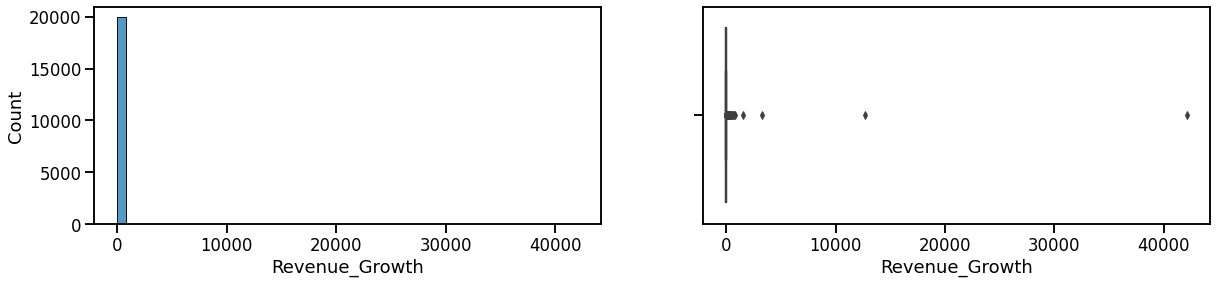

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,4))
g = seaborn.histplot(x= df['Revenue_Growth'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df['Revenue_Growth'], ax= axes[1])


Pueden verse algunos valores extremos para este indicador, utilizamos la funcion clean_outliers

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=df.copy()

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[0])
df_0=clean_outliers(df,seleccion_indicadores[0])

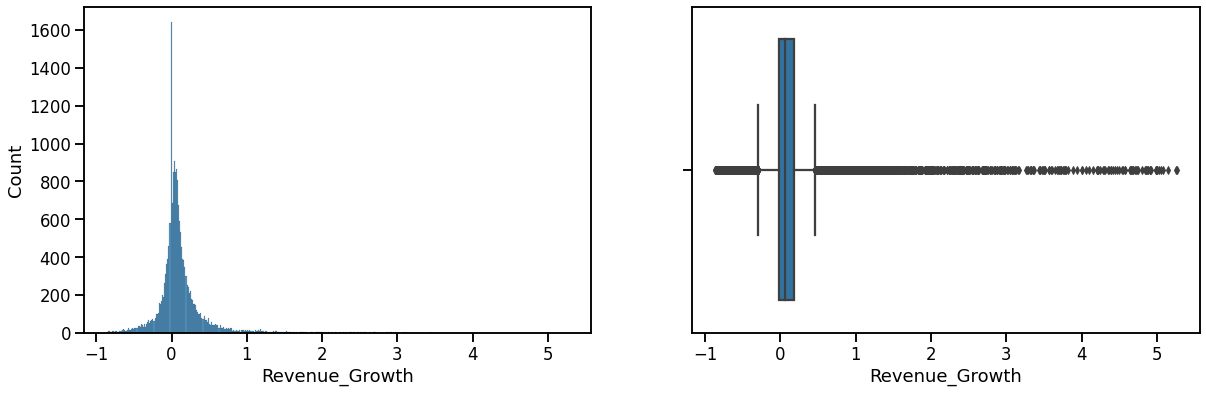

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))
g = seaborn.histplot(x= df_filt_Out['Revenue_Growth'], ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out['Revenue_Growth'], ax= axes[1])

In [ ]:
df_filt_Out[seleccion_indicadores[0]].describe()

count    19589.000000
mean         0.143331
std          0.469517
min         -0.861700
25%         -0.012300
50%          0.057600
75%          0.178400
max          5.261600
Name: Revenue_Growth, dtype: float64

### Gross Profit 
Beneficio Bruto. Es el beneficio de la empresa luego de deducir los costos asociados al producto o servicio. Incluye solo los costos variables y no los costos fijos.

Evalua la eficiencia de la empresa para producir bienes y servicios.

Beneficio bruto = Ingresos - Costo de los bienes vendidos
​


**Distribucion antes de eliminar Outliers**

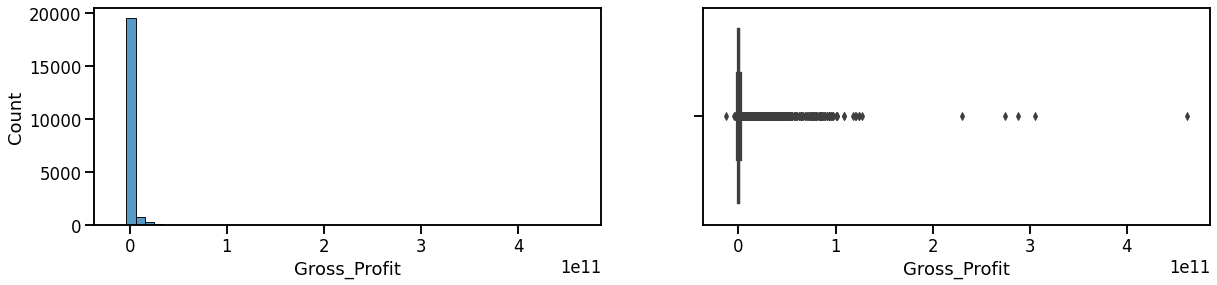

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,4))
g = seaborn.histplot(x= df[seleccion_indicadores[1]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[1]], ax= axes[1])

Aplicamos la funcion Clean_Outliers

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[1])
df_1=clean_outliers(df,seleccion_indicadores[1])

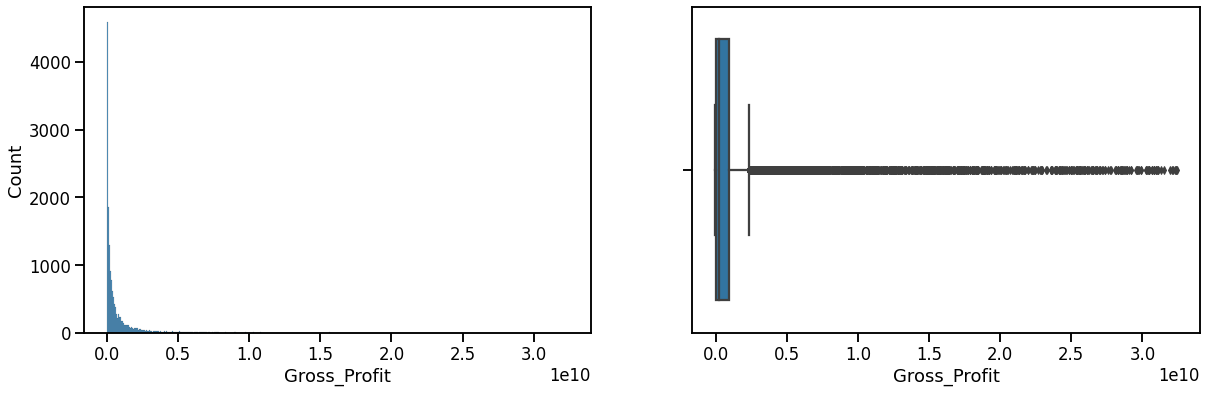

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))
g = seaborn.histplot(x= df_filt_Out[seleccion_indicadores[1]].dropna(), ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out[seleccion_indicadores[1]], ax= axes[1])

In [ ]:
df_filt_Out[seleccion_indicadores[1]].describe()

count    1.919500e+04
mean     1.361524e+09
std      3.605117e+09
min     -1.825000e+06
25%      3.784450e+07
50%      2.123480e+08
75%      8.898520e+08
max      3.240000e+10
Name: Gross_Profit, dtype: float64

### Price to Earnings Ratio

El ratio Price to Earnings (P/E) relaciona el precio de la compañía por acción en relación con sus ganancias por acción. 
Una relación P / E alta podría significar que las acciones de una empresa están sobrevaloradas o que los inversores esperan altas tasas de crecimiento en el futuro.
Las empresas que no tienen ganancias o que están perdiendo dinero no poseen una relación P / E ya que no hay nada que poner en el denominador.

Relación P / E = Ganancias por acción / Valor de mercado por acción

**Distribucion antes de eliminar Outliers**

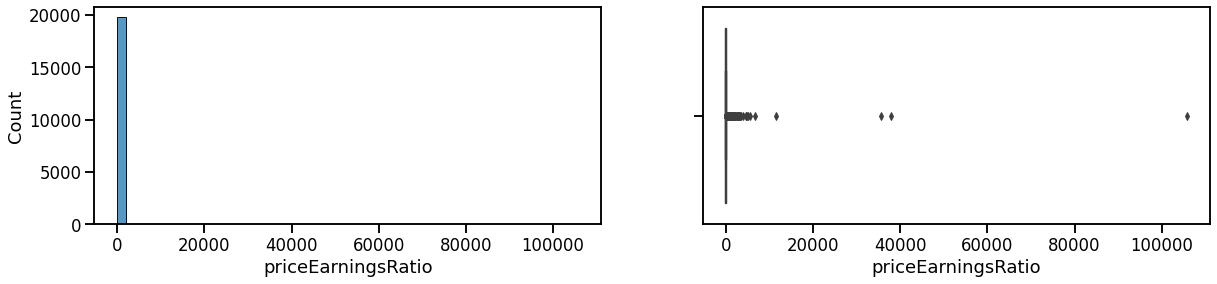

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,4))
g = seaborn.histplot(x= df[seleccion_indicadores[2]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[2]], ax= axes[1])

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[2])
df_2=clean_outliers(df,seleccion_indicadores[2])

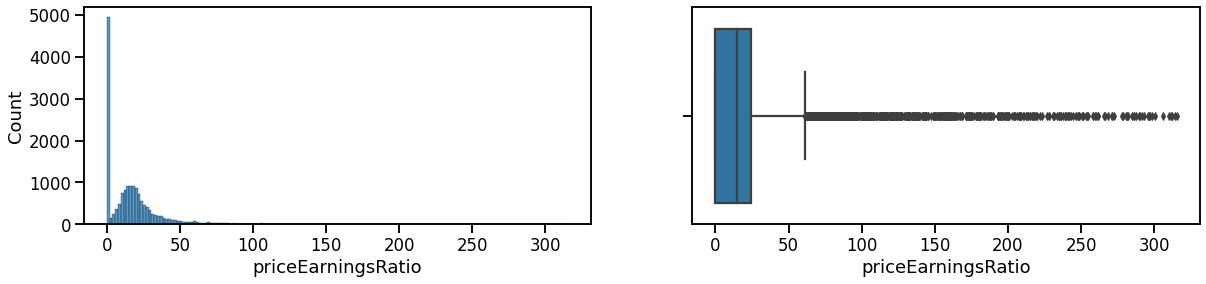

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,4))
g = seaborn.histplot(x= df_filt_Out[seleccion_indicadores[2]], ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out[seleccion_indicadores[2]], ax= axes[1])

In [ ]:
df_2[seleccion_indicadores[2]].describe()

count    19603.000000
mean        18.627473
std         29.786919
min          0.000000
25%          0.000000
50%         12.777100
75%         22.959600
max        311.400000
Name: priceEarningsRatio, dtype: float64

### Price To Free Cash Flows Ratio

El precio al flujo de efectivo libre es una métrica de valoración de acciones que se utiliza para comparar el precio de mercado por acción de una empresa con su monto de flujo de efectivo libre por acción (FCF). Esta métrica es muy similar a la métrica de valoración del precio al flujo de efectivo, pero se considera una medida más exacta, debido al hecho de que utiliza flujo de efectivo libre, que resta los gastos de capital (CAPEX) del flujo de efectivo operativo total de una empresa, reflejando así el flujo de caja real disponible para financiar el crecimiento no relacionado con los activos. 

Price to FCF= Capitalización de Mercado / Flujo de Caja Libre

**Distribucion antes de eliminar Outliers**

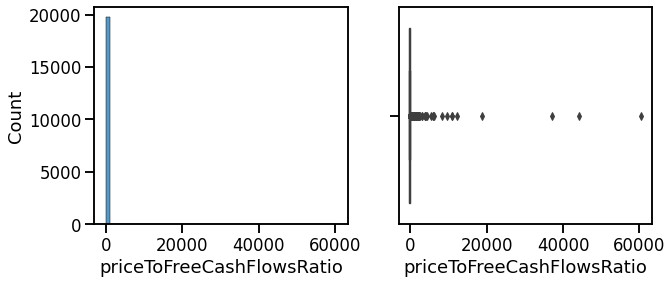

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
g = seaborn.histplot(x= df[seleccion_indicadores[3]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[3]], ax= axes[1])

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[3])
df_3=clean_outliers(df,seleccion_indicadores[3])

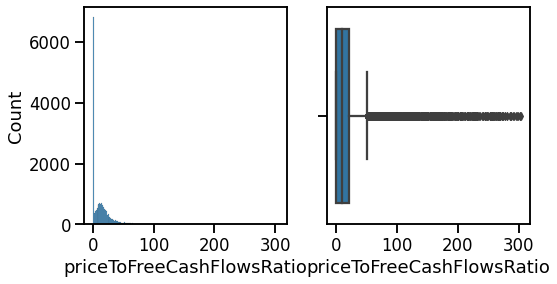

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_filt_Out[seleccion_indicadores[3]], ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out[seleccion_indicadores[3]], ax= axes[1])

In [ ]:
df_3[seleccion_indicadores[3]].describe()

count    19602.000000
mean        16.704507
std         31.189930
min          0.000000
25%          0.000000
50%          8.658150
75%         19.811875
max        338.494200
Name: priceToFreeCashFlowsRatio, dtype: float64

### Earnings Per Share (EPS)

Ganancias por acción (EPS) de una compañía es el ingreso neto dividido por el número de acciones en circulación en el mercado. El numero resultante sirve como indicador de la rentabilidad de una empresa. Cuanto mayor es el EPS, más rentable se la considera. 
Un EPS más alto indica un mayor valor porque los inversores pagarán más por las acciones de una empresa si creen que la empresa tiene mayores ganancias en relación con el precio de sus acciones.

Ganancias por acción = (Utilidad neta  -  Dividendos preferentes) / Acciones ordinarias en circulación al final del período

**Distribucion antes de eliminar Outliers**

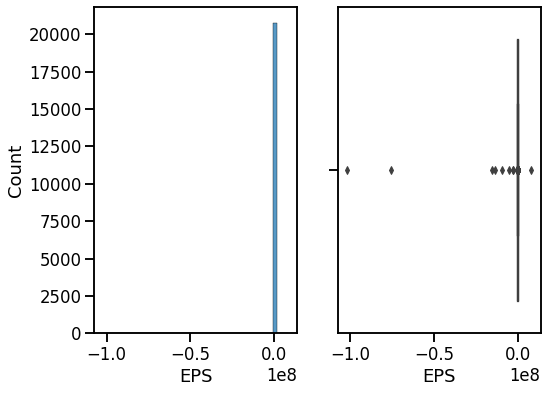

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,6))
g = seaborn.histplot(x= df[seleccion_indicadores[4]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[4]], ax= axes[1])

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[4])
df_4=clean_outliers(df,seleccion_indicadores[4])

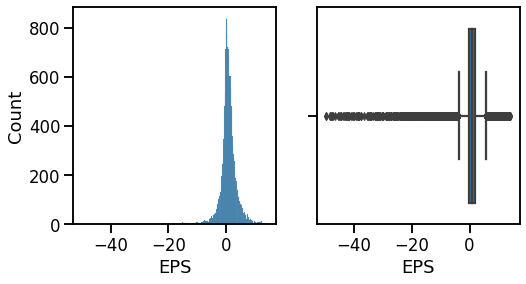

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_filt_Out[seleccion_indicadores[4]], ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out[seleccion_indicadores[4]], ax= axes[1])

In [ ]:
df_filt_Out[seleccion_indicadores[4]].describe()

count    18119.000000
mean         0.528267
std          4.428089
min        -49.800000
25%         -0.310000
50%          0.720000
75%          2.040000
max         14.170000
Name: EPS, dtype: float64

### EBITDA_Margin

El margen EBITDA es una medida de ganancia operativa de una empresa como porcentaje de sus ingresos. La sigla EBITDA significa ganancias antes de intereses, tasas, depreciaciones y amortiaciones. Permite comparar el desempeño de la empresa junto a otras de su sector. El EBITDA es una medida de ganancias que se enfoca en lo esencial de un negocio: su rentabilidad operativa y flujos de efectivo.

Margen EBITDA = (ganancias antes de intereses e impuestos + depreciación + amortización) / ingresos totales



**Distribucion antes de eliminar Outliers**

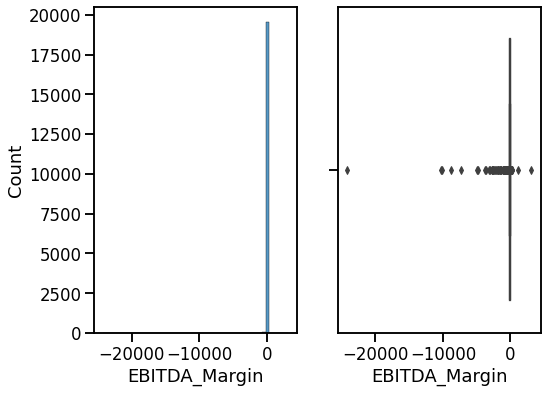

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,6))
g = seaborn.histplot(x= df[seleccion_indicadores[5]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[5]], ax= axes[1])

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[5])
df_5=clean_outliers(df,seleccion_indicadores[5])

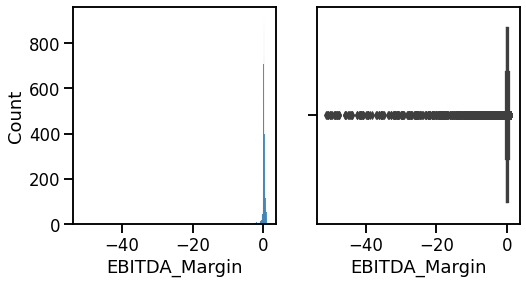

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_filt_Out[seleccion_indicadores[5]], ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out[seleccion_indicadores[5]], ax= axes[1])

In [ ]:
df_filt_Out[seleccion_indicadores[5]].describe()

count    17102.000000
mean        -0.368003
std          3.463113
min        -51.245000
25%          0.034300
50%          0.134000
75%          0.298000
max          0.962000
Name: EBITDA_Margin, dtype: float64

### Price To Sales Ratio

El ratio price-to-sales (P/S) Precio a Ventas, es un ratio de valuación que compara el precio de la acción de la compañía con sus ingresos. Es un indicador del valor que los mercados financieros le han otorgado a cada dólar de las ventas o ingresos de una empresa.

La relación P / S se calcula dividiendo el precio de las acciones por las ventas por acción de dicha empresa.

  
Relación P / S= Valor de mercado por acción / Ventas por acción

**Distribucion antes de eliminar Outliers**

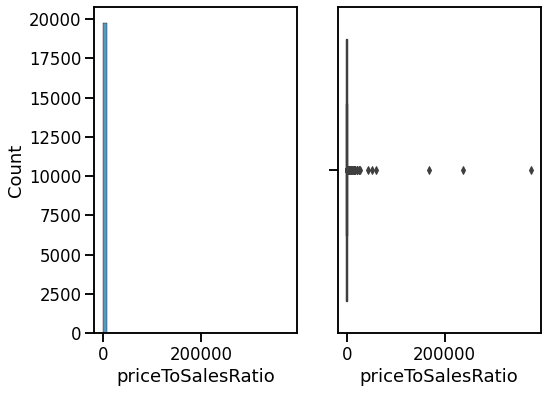

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,6))
g = seaborn.histplot(x= df[seleccion_indicadores[6]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[6]], ax= axes[1])

**Distribucion luego de eliminar Outliers**

In [ ]:
df_filt_Out=clean_outliers(df_filt_Out,seleccion_indicadores[6])
df_6=clean_outliers(df,seleccion_indicadores[6])

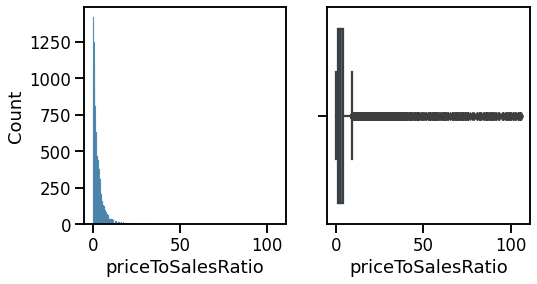

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_filt_Out[seleccion_indicadores[6]], ax= axes[0])
g = seaborn.boxplot(x= df_filt_Out[seleccion_indicadores[6]], ax= axes[1])

In [ ]:
df_filt_Out[seleccion_indicadores[6]].describe()

count    16758.000000
mean         4.112624
std          8.922084
min          0.011100
25%          0.823975
50%          1.893500
75%          4.034725
max        105.747700
Name: priceToSalesRatio, dtype: float64

In [ ]:
len(df_filt_Out)

16758

## Cantidad Registros por Año

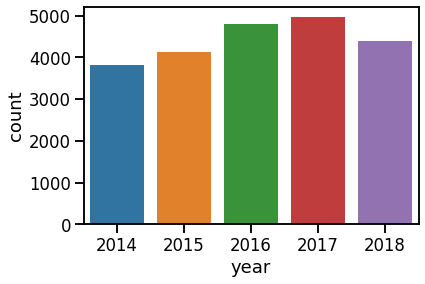

In [ ]:
seaborn.countplot(data=df_filt_Out, x=df.year)

Los registros van desde el año 2014 al año 2018, no se aprecia mucha diferencia entre cantidades de registros por años

## Registros por Sector

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

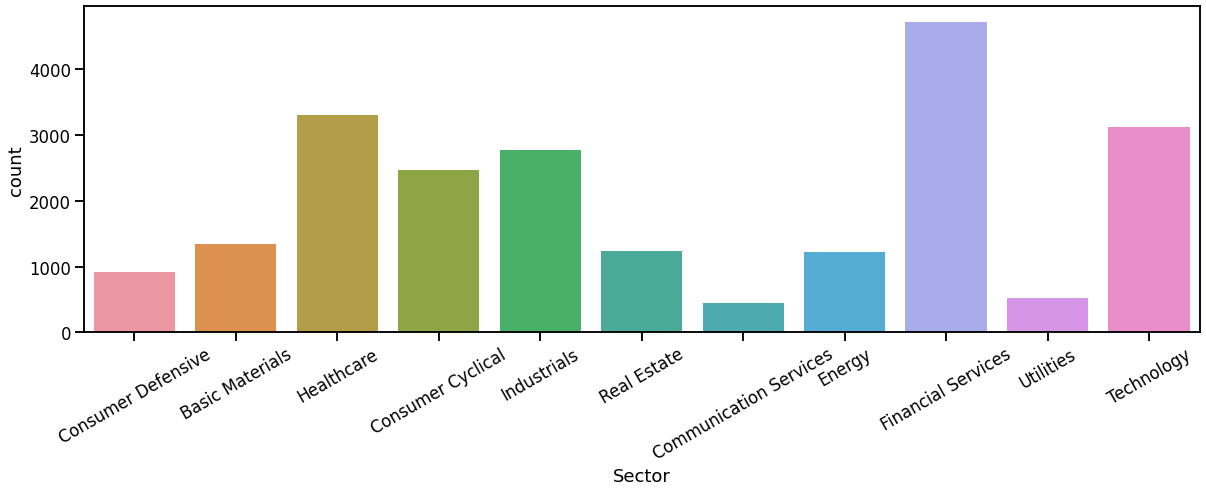

In [ ]:
fig = plt.figure(figsize=(20,6))
seaborn.countplot(data=df, x=df.Sector)
plt.xticks(rotation=30)

## Analisis Variacion anual de precios

### Distribucion Price Var

In [ ]:
Pvar='AnualPriceVariation'

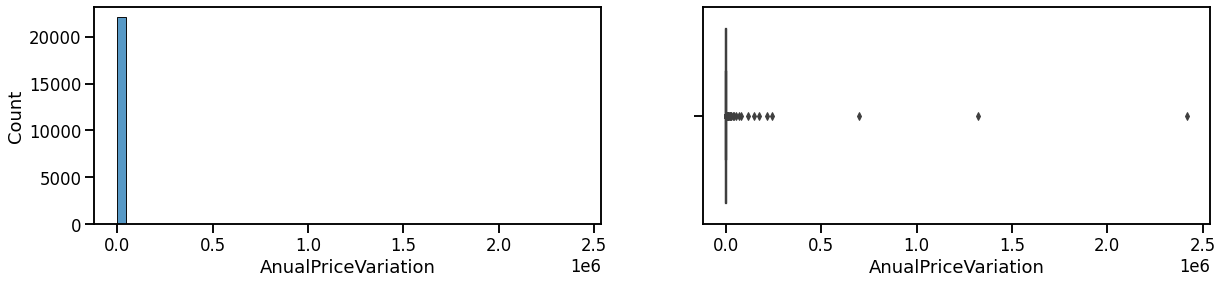

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,4))
g = seaborn.histplot(x= df[Pvar], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[Pvar], ax= axes[1])

In [ ]:
# Eliminación de valores atípicos
def clean_outliers_Pvar(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = ((interesting_col <= (interesting_col.quantile(.99))) & (interesting_col >= (interesting_col.quantile(.005))))
        #numpy.abs(interesting_col - interesting_col.mean()) <= (0.02 * interesting_col.std()))
    return dataset[mask_outlier]

En el boxplot de PVAR se observa algunos valores extremos, utilizamos la funcion clean_outliers para eliminarlos.

In [ ]:
df_Pvar=clean_outliers_Pvar(df_filt_Out,Pvar)

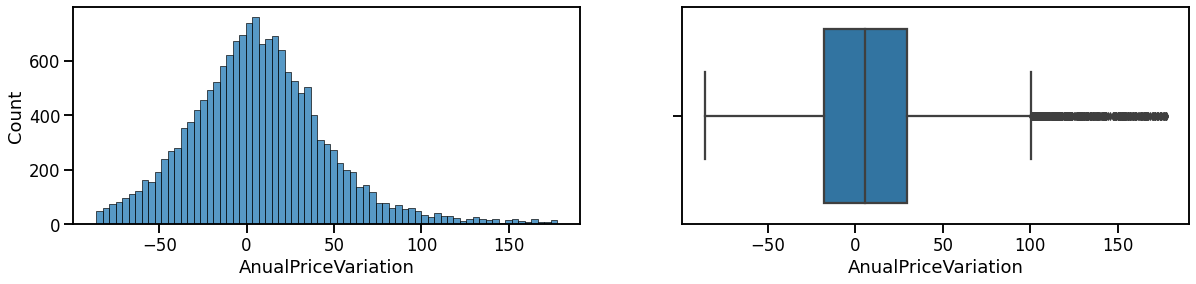

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,4))
g = seaborn.histplot(x= df_Pvar[Pvar], ax= axes[0])
g = seaborn.boxplot(x= df_Pvar[Pvar], ax= axes[1])

In [ ]:
print(len(df_Pvar))
len(df_filt_Out)

16506


16758

Observando el grafico la distribucion parece ser normal, calculamos las medidas descriptivas.

In [ ]:
df_Pvar[Pvar].describe()

count    16506.000000
mean         7.385530
std         39.994900
min        -86.005830
25%        -18.098880
50%          5.247911
75%         29.349073
max        177.777788
Name: AnualPriceVariation, dtype: float64

### **Distribución de PRICE VAR agrupados por año y por sector**

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 10 Text major ticklabel objects>)

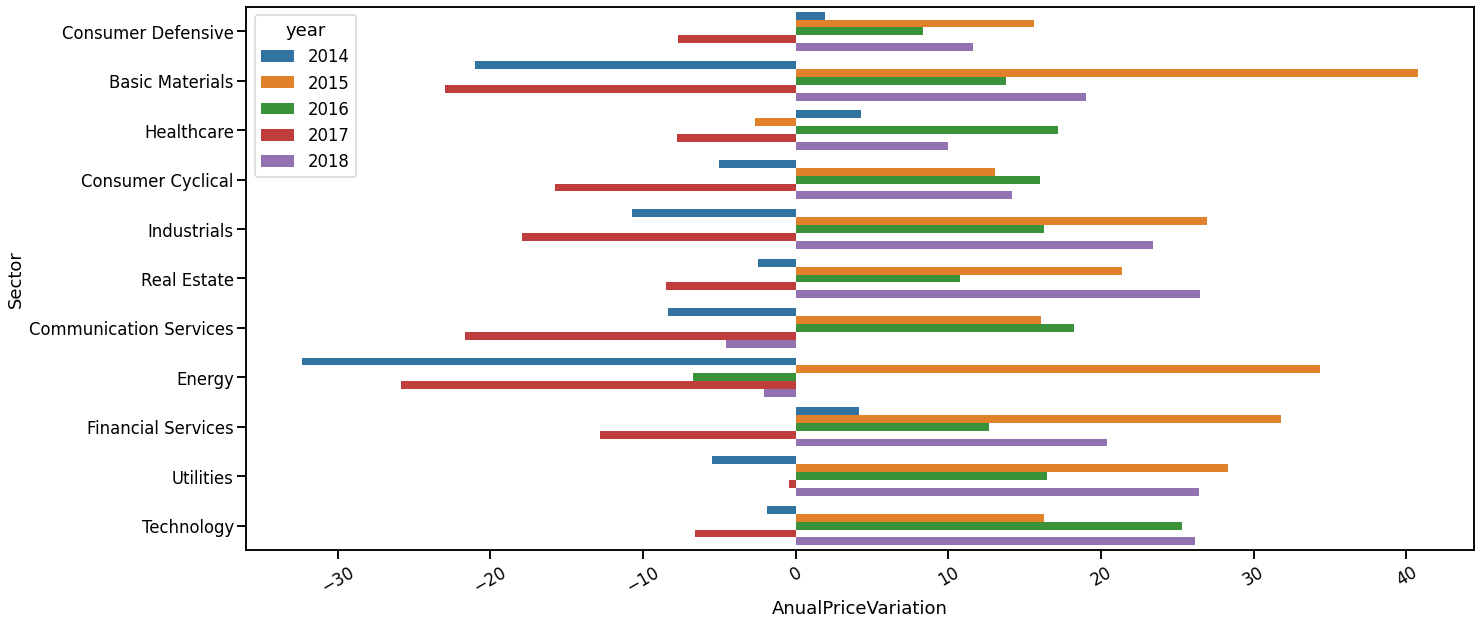

In [ ]:
fig = plt.figure(figsize=(22,10))
seaborn.barplot(data=df_Pvar, y=df_Pvar.Sector, x=df_Pvar.AnualPriceVariation,estimator=numpy.mean, hue=df_Pvar.year, ci = None)
plt.xticks(rotation=30)

Observaciones: Los ci parecen ser bastante elevados en algunos casos, en general podria concluirse que 2014 y 2017 parece haber sido años de caida de precios para todos los sectores mientras que 2015,2016,2018 fueron años de aumento para la mayoria de los sectores.

### Matriz de correlación entre indicadores 

In [ ]:
seleccion_indicadores

['Revenue_Growth',
 'Gross_Profit',
 'priceEarningsRatio',
 'priceToFreeCashFlowsRatio',
 'EPS',
 'EBITDA_Margin',
 'priceToSalesRatio']

Agregamos la Variable distribucion de precios a la seleccion de indicadores

In [ ]:
seleccion_indicadores_Pvar= seleccion_indicadores.copy()
seleccion_indicadores_Pvar.append(Pvar)
print(seleccion_indicadores_Pvar)

['Revenue_Growth', 'Gross_Profit', 'priceEarningsRatio', 'priceToFreeCashFlowsRatio', 'EPS', 'EBITDA_Margin', 'priceToSalesRatio', 'AnualPriceVariation']


Creamos la Matriz de Correlaciones para ver si existe relaciones entre Variables

In [ ]:
df_corr = df_Pvar[seleccion_indicadores_Pvar].corr()


In [ ]:
df_corr

,Revenue_Growth,Gross_Profit,priceEarningsRatio,priceToFreeCashFlowsRatio,EPS,EBITDA_Margin,priceToSalesRatio,AnualPriceVariation
Revenue_Growth,1.000000,-0.068690,-0.008558,-0.011444,-0.037444,-0.043863,0.151297,-0.040582
Gross_Profit,-0.068690,1.000000,0.016269,0.010160,0.195814,0.057384,-0.064065,0.012525
priceEarningsRatio,-0.008558,0.016269,1.000000,0.153652,0.102911,0.104142,-0.035424,0.028767
priceToFreeCashFlowsRatio,-0.011444,0.010160,0.153652,1.000000,0.092662,0.076806,-0.013008,0.037278
EPS,-0.037444,0.195814,0.102911,0.092662,1.000000,0.243945,-0.157911,0.098743
EBITDA_Margin,-0.043863,0.057384,0.104142,0.076806,0.243945,1.000000,-0.600521,0.065535
priceToSalesRatio,0.151297,-0.064065,-0.035424,-0.013008,-0.157911,-0.600521,1.000000,-0.056588
AnualPriceVariation,-0.040582,0.012525,0.028767,0.037278,0.098743,0.065535,-0.056588,1.000000


**Correlacion entre indicadores seleccionados sin eliminar outliers**

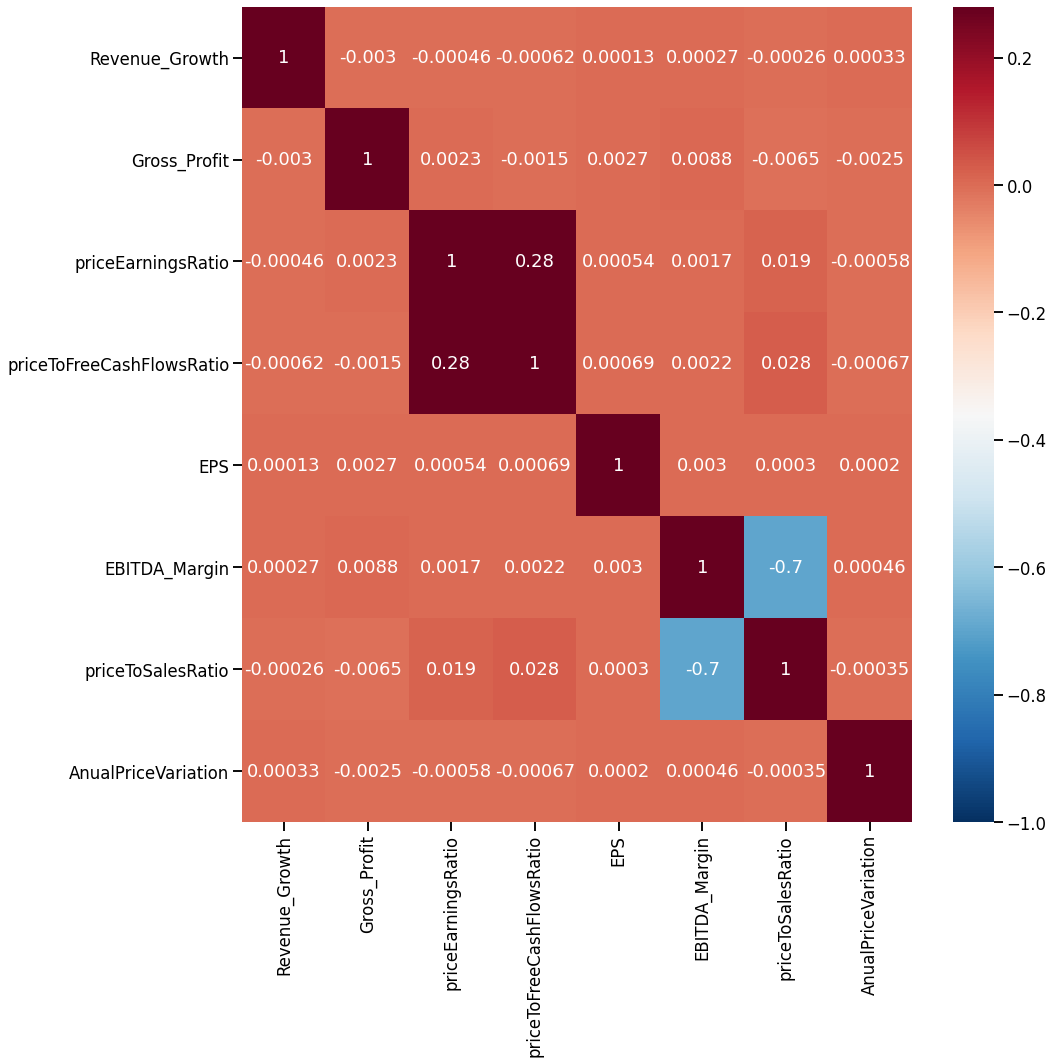

In [ ]:
plt.figure(figsize=(15, 15))
seaborn.heatmap(df[seleccion_indicadores_Pvar].corr(), vmin=-1, vmax=0.28, annot=True, cmap='RdBu_r')

**Correlacion entre indicadores seleccionados luego de eliminar outliers**

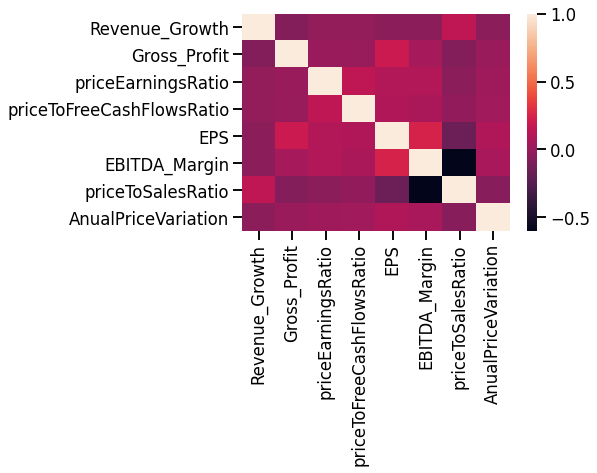

In [ ]:
seaborn.heatmap(df_corr)

Realizamos Scatterplot para aquellas variables que tienen correlaciones mas fuertes. 

De acuerdo a lo que obsevamos en el mapa de color con los ratios / indices con aplicación de limpieza de outliers, podemos observar que existe correlación negativa entre el ratio EBITDA Margin y el ratio Price To Sales. Observamos que son ratios diferentes, que en las empresas que se muestran aqui, se comportan de manera opuesta. El EBITDA Margin demuestra la fortaleza de la empresa en generar ingresos de acuerdo a las ventas que produce, por lo que un mayor margen significa que su estructura es capaz de afrontar los gastos y producirá mayor ganancia. El ratio Price to Sales, refleja el ratio de precio de acción contra las ventas que la empresa realiza por acción; cuánto más “chico” sea el resultado, mayor beneficio tendrá por acción el poseedor de esa acción. 

### Price to Sales Ratio vs EBITDA_Margin

<Figure size 1080x1080 with 0 Axes>

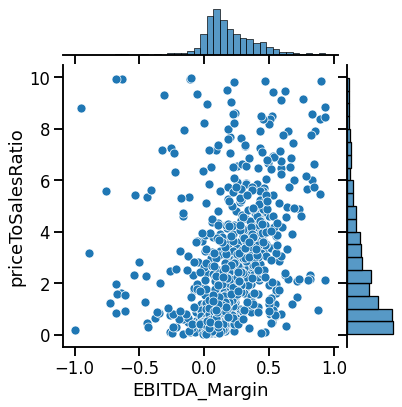

In [ ]:

mask=((df_filt_Out[seleccion_indicadores[5]]>-1)&(df_filt_Out[seleccion_indicadores[6]]<10))
seaborn.jointplot(data=df_filt_Out[mask].sample(1000),
                  x=seleccion_indicadores[5],
                  y=seleccion_indicadores[6],
                  kind='scatter')

### EPS vs EBITDA Margin

Dentro de las mayores correlaciones positivas, podemos mencionar el ratio EPS vs. Revenue_Growth. Sobre esta relación, inferimos que el Revenue_growth demuestra la evolución en los ingresos entre el presente período y el anterior (si aumentan las ventas del presente periodo respecto del anterior, el ratio será positivo). El ratio EPS es estático, y refleja la ganancia por cada una de las acciones. 

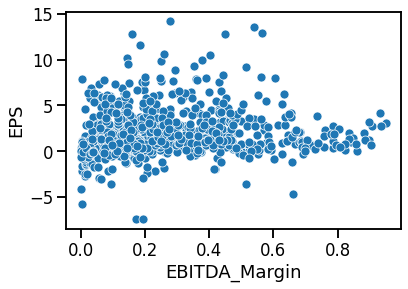

In [ ]:
data1=df_Pvar[(df_Pvar[seleccion_indicadores[5]]>0)&(df_Pvar[seleccion_indicadores[4]]>-10)].sample(1000)
seaborn.scatterplot(data=data1,
                    x=data1[seleccion_indicadores[5]],
                    y=data1[seleccion_indicadores[4]])

**A continuación reflejamos otras comparaciones entre ratios.** 

### EPS vs Revenue_growth

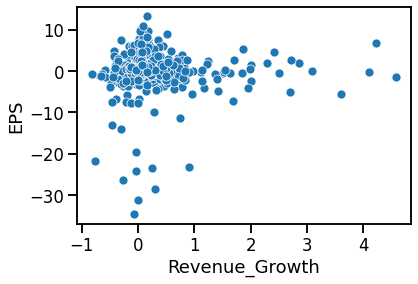

In [ ]:
data1=df_Pvar.sample(1000)
seaborn.scatterplot(data=data1,
                    x=data1[seleccion_indicadores[0]],
                    y=data1[seleccion_indicadores[4]])

### PEPS vs Gross Profit

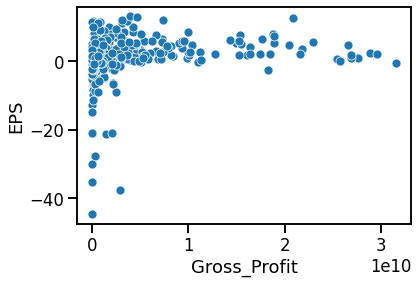

In [ ]:
data1=df_Pvar.sample(1000)
seaborn.scatterplot(data=data1,
                    x=data1[seleccion_indicadores[1]],
                    y=data1[seleccion_indicadores[4]])

### Price to Cash Flow Ratio vs Price earnings Ratio



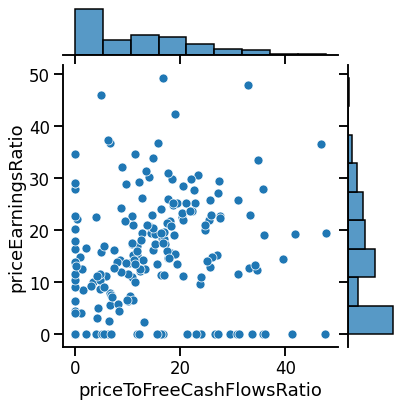

In [ ]:
mask=((df_filt_Out[seleccion_indicadores[3]]<50)&(df_filt_Out[seleccion_indicadores[2]]<50))
seaborn.jointplot(data=df_filt_Out[mask].sample(250),
                  x=seleccion_indicadores[3],
                  y=seleccion_indicadores[2],
                  kind='scatter')